## Import libraries

In [88]:
import re
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()
from tqdm import tqdm_notebook as tqdm

%pylab inline
pylab.rcParams['figure.figsize'] = (16, 6)

Populating the interactive namespace from numpy and matplotlib


## Load dataset

In [35]:
CSV_FILE_PATH = {
    'transition' : 'data/LA_TRANSITION_ECOLOGIQUE.csv',
    'fiscalite': 'data/LA_FISCALITE_ET_LES_DEPENSES_PUBLIQUES.csv',
    'democratie': 'data/DEMOCRATIE_ET_CITOYENNETE.csv',
    'organisation': 'data/ORGANISATION_DE_LETAT_ET_DES_SERVICES_PUBLICS.csv'
}

In [36]:
selected_topic = 'fiscalite'
raw_df = pd.read_csv(CSV_FILE_PATH[selected_topic])
raw_shape = raw_df.shape[0]

## Deduplicate and clean column names

###### Deduplication on 'id' column

In [37]:
df = raw_df.drop_duplicates('id')
nb_samples = df.shape[0]
nb_removed = raw_shape - nb_samples
print(">>> #duplicates removed: {}".format(nb_removed))
print(">>> #samples           : {}".format(nb_samples))

>>> #duplicates removed: 317
>>> #samples           : 126482


###### Column name formatting

In [38]:
QUESTION_PATTERN = re.compile(r"(?P<question_code>\w{17})(?: - )(?P<question_description>.*)")
QUESTION_DESCRIPTION = dict()

def split_column_name(column_name):
    _match = QUESTION_PATTERN.match(column_name)
    if not _match:
        return column_name
    code = _match.group('question_code')
    QUESTION_DESCRIPTION[code] = _match.group('question_description')
    return code

new_columns = df.columns.map(split_column_name)
df.columns = new_columns

In [39]:
pprint(QUESTION_DESCRIPTION)

{'QUXVlc3Rpb246MTY0': "Quels sont selon vous les impôts qu'il faut baisser en "
                      'priorité ?',
 'QUXVlc3Rpb246MTY1': 'Quels sont les domaines prioritaires où notre '
                      'protection sociale doit être renforcée ?',
 'QUXVlc3Rpb246MTY2': 'Pour quelle(s) politique(s) publique(s) ou pour quels '
                      "domaines d'action publique, seriez-vous prêts à payer "
                      "plus d'impôts ?",
 'QUXVlc3Rpb246MTY3': "Y a-t-il d'autres points sur les impôts et les dépenses "
                      'sur lesquels vous souhaiteriez vous exprimer ?',
 'QUXVlc3Rpb246MTYy': 'Quelles sont toutes les choses qui pourraient être '
                      "faites pour améliorer l'information des citoyens sur "
                      "l'utilisation des impôts ?",
 'QUXVlc3Rpb246MTYz': 'Que faudrait-il faire pour rendre la fiscalité plus '
                      'juste et plus efficace ?',
 'QUXVlc3Rpb246MjA1': "S'il faut selon vous revoir les conditi

In [41]:
df.head()

,id,reference,title,createdAt,publishedAt,updatedAt,trashed,trashedStatus,authorId,authorType,authorZipCode,QUXVlc3Rpb246MTYy,QUXVlc3Rpb246MTYz,QUXVlc3Rpb246MTY0,QUXVlc3Rpb246MjA2,QUXVlc3Rpb246MjA1,QUXVlc3Rpb246MTY1,QUXVlc3Rpb246MTY2,QUXVlc3Rpb246MTY3
0,UHJvcG9zYWw6YTY1MmU0YTMtMWUyMC0xMWU5LTk0ZDItZm...,3-2,TVA sociale,2019-01-22 09:35:18,2019-01-22 09:35:18,NaN,False,NaN,VXNlcjo3ZTVjYTUwMi0xZDZlLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,94800,NaN,NaN,NaN,diminuer la CSG de 2 points et en contrepartie...,NaN,NaN,NaN,NaN
1,UHJvcG9zYWw6ZGNhY2VhYmYtMWUyMC0xMWU5LTk0ZDItZm...,3-3,Augmentation du pouvoir d'achat,2019-01-22 09:36:50,2019-01-22 09:38:01,NaN,False,NaN,VXNlcjo5NmNhYWM4ZS0xZTIwLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Améliorer le pouvoir d’achat en augmentant les...
2,UHJvcG9zYWw6MDhhMWNkOTQtMWUyMS0xMWU5LTk0ZDItZm...,3-4,le patrimoine en or dans l'IFI,2019-01-22 09:38:03,2019-01-22 09:38:03,NaN,False,NaN,VXNlcjo3ZTVjYTUwMi0xZDZlLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,94800,NaN,NaN,NaN,Réforme de l'IFI pour y inclure le patrimoine ...,NaN,NaN,NaN,NaN
3,UHJvcG9zYWw6NGZlNTVlMDMtMWUyMS0xMWU5LTk0ZDItZm...,3-6,Pouvoir d achat,2019-01-22 09:40:03,2019-01-22 09:40:03,NaN,False,NaN,VXNlcjpjNDY0ZjllMy0xZDk4LTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,35000,NaN,Repartir les richesses. suppression de la tax...,Csg .taxe d habitation .,Revoir les conditions d'attribution de certain...,NaN,Santé. Éducation,NaN,NaN
4,UHJvcG9zYWw6NmQ3MmU3ZDMtMWUyMS0xMWU5LTk0ZDItZm...,3-8,droits et devoirs,2019-01-22 09:40:53,2019-01-22 09:40:53,NaN,False,NaN,VXNlcjo3MDdkM2IzOC0xZDYxLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,22680,NaN,"Les droits soient automatiques, comme nos devo...",NaN,NaN,on nous parle toujours de nos devoirs mais rar...,NaN,NaN,NaN


## CreationAt analysis

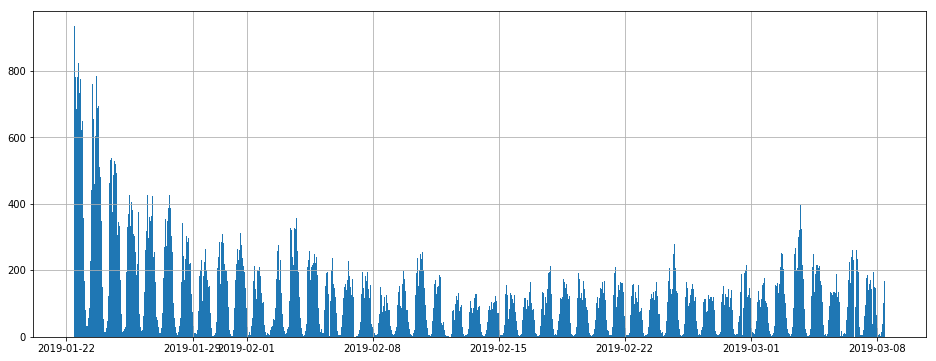

In [44]:
pd.to_datetime(df.createdAt).hist(bins=1000)

* Higher participation on Sundays
* Very high participation at the beginning


## ZipCode (-> department) Analysis

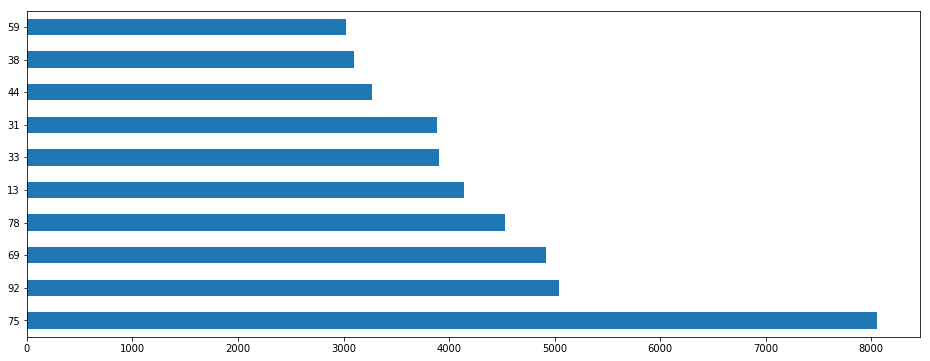

In [45]:
def to_department(zip_code):
    return int(zip_code / 1000)

department_codes = df.authorZipCode.apply(to_department)
department_codes.value_counts().iloc[:10].plot(kind='barh')

## Analyse filling rate / question

In [46]:
for question_key, description in QUESTION_DESCRIPTION.items():
    print(description)
    nb_samples = df.shape[0]
    nb_missing = df[question_key].isna().sum()
    fill_rate = round(1 - nb_missing/nb_samples, 2)
    print(">>> Fill rate: {}%\n".format(fill_rate))

Quelles sont toutes les choses qui pourraient être faites pour améliorer l'information des citoyens sur l'utilisation des impôts ?
>>> Fill rate: 0.7%

Que faudrait-il faire pour rendre la fiscalité plus juste et plus efficace ?
>>> Fill rate: 0.83%

Quels sont selon vous les impôts qu'il faut baisser en priorité ?
>>> Fill rate: 0.75%

Afin de financer les dépenses sociales, faut-il selon vous...
>>> Fill rate: 0.83%

S'il faut selon vous revoir les conditions d'attribution de certaines aides sociales, lesquelles doivent être concernées ?
>>> Fill rate: 0.67%

Quels sont les domaines prioritaires où notre protection sociale doit être renforcée ?
>>> Fill rate: 0.7%

Pour quelle(s) politique(s) publique(s) ou pour quels domaines d'action publique, seriez-vous prêts à payer plus d'impôts ?
>>> Fill rate: 0.7%

Y a-t-il d'autres points sur les impôts et les dépenses sur lesquels vous souhaiteriez vous exprimer ?
>>> Fill rate: 0.71%



## Clean text answers


###### To run only once (download stopwords)
```
import nltk
nltk.download('stopwords')
```

In [78]:
from nltk.corpus import stopwords

french_stopwords = set(stopwords.words('french'))
french_stopwords.update({'les', 'a'})

In [79]:
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in french_stopwords])

def remove_specials(text):
    return re.sub("[-,\':]", " ", text)

clean_callbacks = [
    str.lower,
    remove_specials,
    remove_stopwords
]

def clean(text):
    for _callback in clean_callbacks:
        text = _callback(text)
    return text

cleaned = df['QUXVlc3Rpb246MTYy'].dropna().apply(clean)

## Most common words


In [80]:
# tokenize
as_tokens = cleaned.apply(str.split).values

# flatten
stacked_tokens = [token for sublist in as_tokens for token in sublist]

###### Stemming

In [87]:
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()

stemmed_tokens = [stemmer.stem(token) for token in tqdm(stacked_tokens)]

100%|██████████| 1806214/1806214 [00:50<00:00, 35479.22it/s]


###### Top-50 words

In [89]:
pd.Series(stemmed_tokens).value_counts().iloc[:50]

impôt          28936
dépens         23366
plus           20713
inform         16784
chaqu          15464
tout           13981
utilis         13940
citoyen        13280
tous           11576
publiqu        10870
être           10265
fair            9484
transparent     9351
compt           9167
état            8859
budget          8659
franc           8131
public          7790
tax             7478
pai             7438
annuel          7399
fiscal          7220
servic          7205
sit             7131
coût            7087
expliqu         7071
don             6822
anné            6801
grand           6735
fait            6594
comm            6439
social          6378
cel             6073
commun          5876
argent          5724
exempl          5710
collect         5659
faut            5577
financ          5433
part            5373
contribu        5280
cet             5130
etat            5115
internet        5090
répartit        5022
fonction        4996
clair           4974
simpl        

## Advanced time analysis

* evolution of words over time : take for example the top-50 words and analyze their frequency use over time (maybe it's time to explore jupyter notebook widgets ? we could use a dropdown)